In [46]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dgs_results = Path().resolve()
dgs_results = Path(dgs_results / "DeepGlycanSite/DeepGlycanSite/User/example.txt")


dgs_results

PosixPath('/Users/higgins/Documents/GitHub/docking_simulation_helpers/DeepGlycanSite/DeepGlycanSite/User/example.txt')

In [47]:
print(dgs_results.exists())

True


In [84]:
residue_number = []
galnac_probabilities = []

with open(dgs_results, "r") as file:
    lines = file.readlines()
    for line in lines:
        num = line.split("[")[1]
        num = num.split("]")[0]
        num = float(num)

        galnac_probabilities.append(num)
        residue_number.append(len(galnac_probabilities))
        

In [89]:
gd2_probabilities = []

gd2_results = Path().resolve()
gd2_results = Path(gd2_results / "DeepGlycanSite/DeepGlycanSite/User/cbm3-gd2.txt")

print(gd2_results.exists())
count = 1

with open(gd2_results, "r") as file:
    lines = file.readlines()
    for line in lines:
        num = line.split("[")[1]
        num = num.split("]")[0]
        num = float(num)

        gd2_probabilities.append(num)
        residue_number.append(count)
        count += 1

True


In [90]:
data = pd.DataFrame(columns=["Residue Number", "Binding Probabilities"])

In [ ]:
data["Binding Probabilities GalNAc"] = galnac_probabilities
data["Binding Probabilities GD2"] = gd2_probabilities
data["Binding Probabilities"] = galnac_probabilities + gd2_probabilities
data["Residue Number"] = residue_number

significant_residues = [33, 61, 63, 66, 79, 80, 127]

data_filtered = data[data["Residue Number"].isin(significant_residues)]
data_filtered

ValueError: Length of values (2) does not match length of index (137)

/var/folders/hf/cpph_csd2x15wb74htypnvbh0000gp/T/ipykernel_35067/29040848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["Enzyme"] = "CBM32"


ValueError: Names should be list-like for a MultiIndex

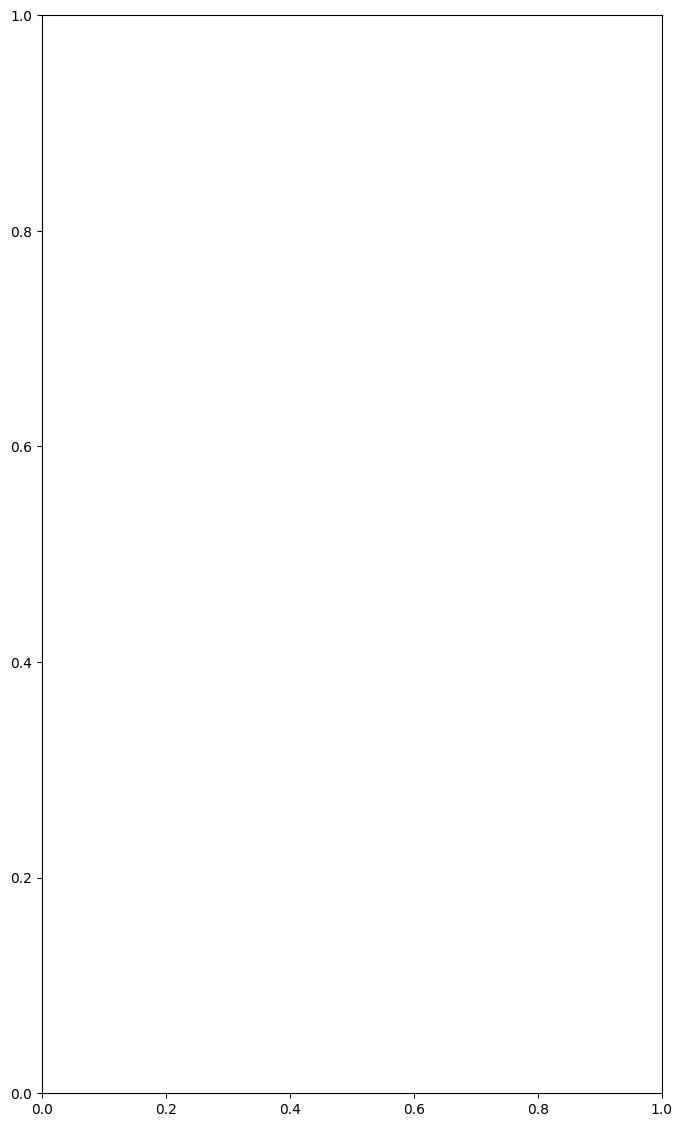

In [ ]:
plt.figure(
    figsize=(8,14)
)

residue_labels = ["Y33", "V61", "P63", "E66", "E79", "D80", "K127"]

data_filtered["Enzyme"] = 

residue_graph = sns.barplot(
    data=data_filtered,
    y="Binding Probabilities",
    x="Residue Number",
    hue="Enzyme",
    palette=["#f4a261"]
)

residue_graph.set_xlabel("Residue")
residue_graph.set_ylabel("Binding Probability")
residue_graph.set_xticklabels(residue_labels)
#residue_graph.set_ybound(0.1)